In [1276]:
import pandas as pd 
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [1277]:
df = pd.read_csv("master.csv" )

In [1278]:
DF = df[df['country'].isin(['Russian Federation'])]

Text(0, 0.5, 'Количество смертей на 100к человек')

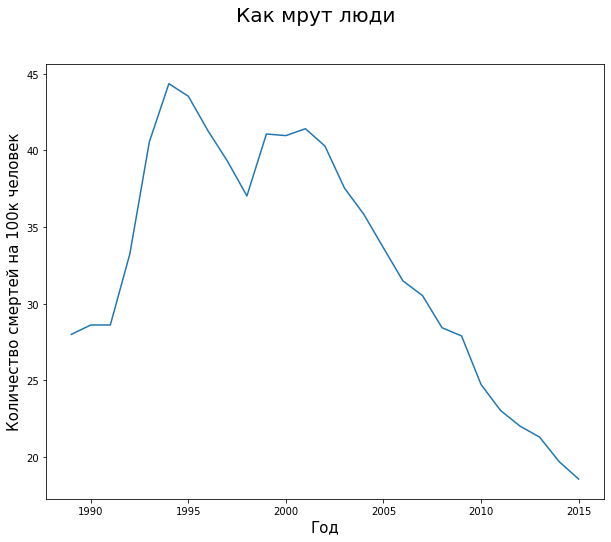

In [1279]:
A = DF.groupby(['year']).agg({'sum'})['suicides_no']
D = DF.groupby(['year']).agg(['sum'])['population']
years = list(A.index)
kills = []
for i in range(len(A)):
    kills.append(A.iloc[i, 0]/D.iloc[i, 0]*100000)

x = np.array(years)
y = np.array(kills)

fig, axs = plt.subplots(nrows= 1 , ncols= 1, figsize = (10, 8))
fig. suptitle('Как мрут люди', fontsize=20)
axs.plot(x, y)
axs.set_xlabel('Год', fontsize=15)
axs.set_ylabel('Количество смертей на 100к человек', fontsize=15)


Text(0, 0.5, 'Количество смертей на 100к человек')

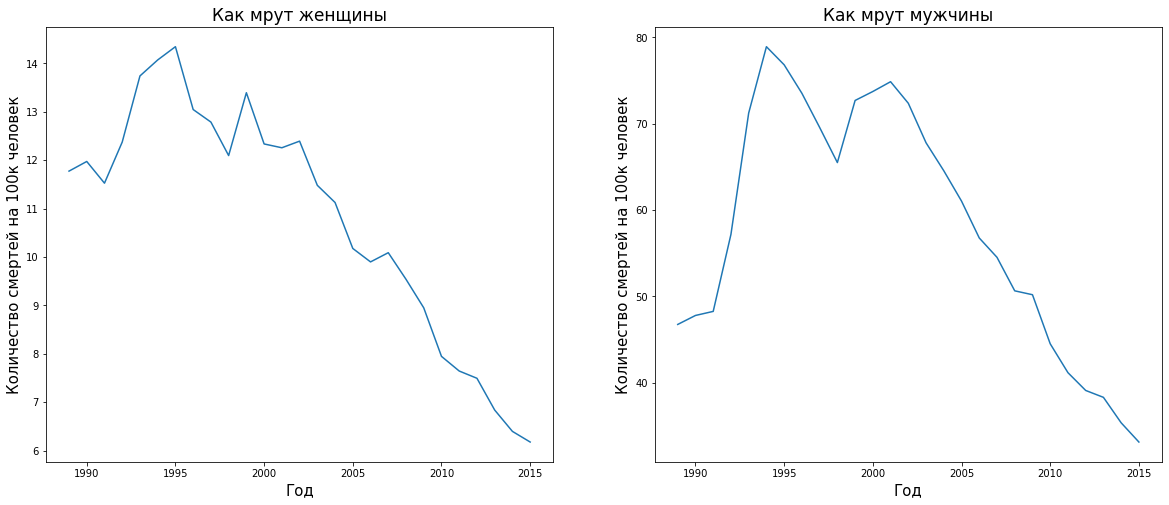

In [1280]:
DF_female = DF[DF['sex'].isin(['female'])]
B = DF_female.groupby(['year']).agg(['sum'])['suicides_no']
D = DF_female.groupby(['year']).agg(['sum'])['population']
women_years = list(B.index)
women_kills = []
for i in range(len(B)):
    women_kills.append(B.iloc[i, 0]/D.iloc[i, 0]*100000)

DF_male = DF[DF['sex'].isin(['male'])]
B = DF_male.groupby(['year']).agg(['sum'])['suicides_no']
D = DF_male.groupby(['year']).agg(['sum'])['population']
men_years = list(B.index)
men_kills = []
for i in range(len(B)):
    men_kills.append(B.iloc[i, 0]/D.iloc[i, 0]*100000)

x_f = np.array(women_years)
y_f = np.array(women_kills)
x_m = np.array(men_years)
y_m = np.array(men_kills)


fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (20, 8) )
axs[0].set_title('Как мрут женщины', fontsize=17)
axs[0].plot(x_f, y_f)
axs[0].set_xlabel('Год', fontsize=15)
axs[0].set_ylabel('Количество смертей на 100к человек', fontsize=15)



axs[1].set_title('Как мрут мужчины', fontsize=17)
axs[1].plot(x_m, y_m)
axs[1].set_xlabel('Год', fontsize=15)
axs[1].set_ylabel('Количество смертей на 100к человек', fontsize=15)

Text(0, 0.5, 'Количество смертей на 100к человек')

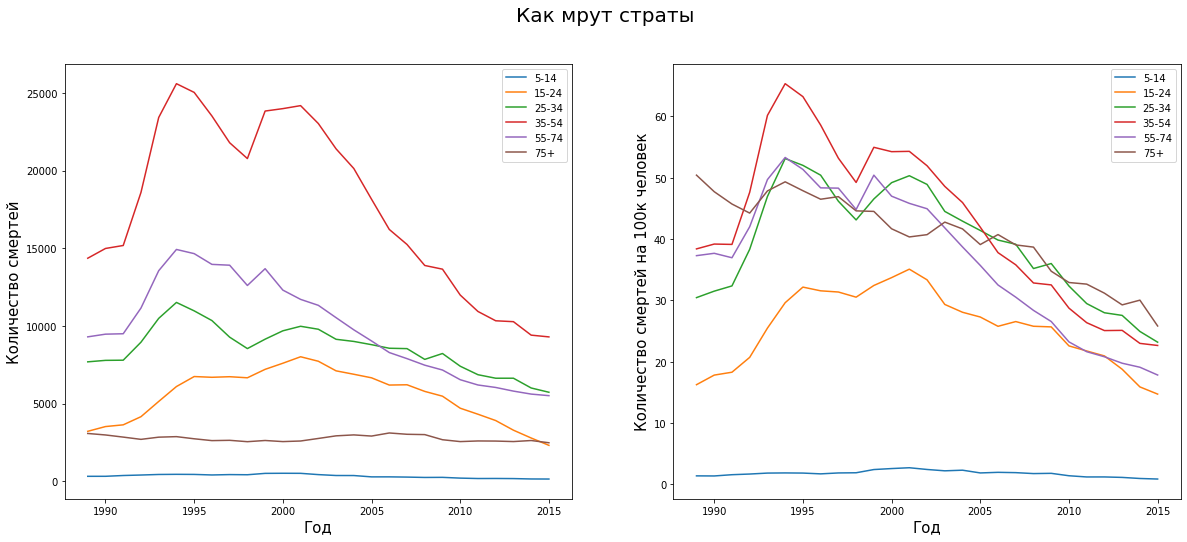

In [1281]:
B = DF.groupby(['year']).agg({'sum'})['suicides/100k pop']
Y = list(B.index)


def func_1(h: str):
  K = DF[DF['age'].isin([h])]
  B = K.groupby(['year']).agg({'sum'})['suicides_no']
  B["sum"]
  years = list(B.index)
  kills = []
  for i in range(len(B)):
      kills.append(B.iloc[i, 0])
  return kills

x_1 = func_1('5-14 years')
x_2 = func_1('15-24 years')
x_3 = func_1('25-34 years')
x_4 = func_1('35-54 years')
x_5 = func_1('55-74 years')
x_6 = func_1('75+ years')

fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (20, 8) )
fig. suptitle('Как мрут страты', fontsize=20)
axs[0].plot(Y, x_1, label = '5-14')
axs[0].plot(Y, x_2, label = '15-24')
axs[0].plot(Y, x_3, label = '25-34')
axs[0].plot(Y, x_4, label = '35-54')
axs[0].plot(Y, x_5, label = '55-74')
axs[0].plot(Y, x_6, label = '75+')
axs[0].legend()
axs[0].set_xlabel('Год', fontsize=15)
axs[0].set_ylabel('Количество смертей', fontsize=15)

def func_2(h: str):
  K = DF[DF['age'].isin([h])]
  B = K.groupby(['year']).agg({'sum'})['suicides_no']
  D = K.groupby(['year']).agg(['sum'])['population']
  years = list(B.index)
  kills = []
  for i in range(len(B)):
      kills.append(B.iloc[i, 0]/D.iloc[i, 0]*100000)
  return kills

z_1 = func_2('5-14 years')
z_2 = func_2('15-24 years')
z_3 = func_2('25-34 years')
z_4 = func_2('35-54 years')
z_5 = func_2('55-74 years')
z_6 = func_2('75+ years')

axs[1].plot(Y, z_1, label = '5-14')
axs[1].plot(Y, z_2, label = '15-24')
axs[1].plot(Y, z_3, label = '25-34')
axs[1].plot(Y, z_4, label = '35-54')
axs[1].plot(Y, z_5, label = '55-74')
axs[1].plot(Y, z_6, label = '75+')
axs[1].legend()
axs[1].set_xlabel('Год', fontsize=15)
axs[1].set_ylabel('Количество смертей на 100к человек', fontsize=15)

**НОВЫЕ ДАННЫЕ**

In [1282]:
#инфляция в процентах (начиная с 89 года)
inflation = [11, 19, 160.4, 2508.8, 840.0, 214.8, 131.6, 21.8, 11.0, 84.5, 36.6, 20.1, 18.8, 15.06, 11.99, 11.74, 10.91, 9.0, 11.87, 13.28, 8.8, 8.78, 6.1, 6.58, 6.45, 11.36, 12.9]
#доллар в рублях
dollar = [2, 1.8, 0.5571, 25.26, 417.0, 1259.0, 3623.0, 4661.0, 5560.0, 5.96, 20.65, 27.00, 28.16, 30.13, 31.78, 29.45, 27.74, 28.78, 26.33, 24.54, 29.39, 30.18, 30.35, 32.19, 30.37, 32.65, 56.23]
#стоимость барреля в долларах
barrel = [18.2, 23.7, 20.0, 19.3, 17.0, 15.8, 17.0, 20.6, 19.1, 12.8, 17.8, 28.5, 24.4, 24.9, 28.5, 37.9, 55.1, 66.0, 72.7, 98.4, 62.8, 80.2, 110.9, 109.5, 108.8, 99.5, 53.7]  
#прожиточный минимум в рублях
projmin = [90, 170, 210, 493, 20.6, 86.6, 264.1, 369.4, 411.2, 493.3, 907.8, 1210, 1500, 1808, 2112, 2376, 3018, 3422, 3847, 4593, 5153, 5688, 6369, 6510, 7306, 8050, 9701]


inf = []
for i in inflation:
  for k in range(12):
    inf.append(i)

dol = []
for i in dollar:
  for k in range(12):
    dol.append(i)

bar = []
for i in barrel:
  for k in range(12):
    bar.append(i)

proj = []
for i in projmin:
  for k in range(12):
    proj.append(i)

DF['inflation (%)'] = inf
DF['dollar (₽)'] = dol
DF['cost of oil ($/barrel)'] = bar
DF['living wage (₽)'] = proj


<ipython-input-1282-91eb465100d9>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['inflation (%)'] = inf
<ipython-input-1282-91eb465100d9>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['dollar (₽)'] = dol
<ipython-input-1282-91eb465100d9>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

**Функции для посчёта корреляций**

In [1283]:
itog_cor_gdp = []
def syr(a: str, b: str, p = 1, VALY = True):
  global itog_cor_inf
  ryt = DF[(DF.age == a) & (DF.sex == b)]

  gdp_cor = list(ryt[" gdp_for_year ($) "])
  for i in range(len(gdp_cor)):
    gdp_cor[i] = int((gdp_cor[i].replace(",", "")))
  gdp_cor = np.array(gdp_cor)

  gdp = gdp_cor / p
  yeear = np.array(ryt["year"])
  suicide_cor = np.array(ryt['suicides/100k pop'])

  suicide_cor_av = np.mean(suicide_cor)
  suicide_cor_avv = np.ones(len(suicide_cor)) * suicide_cor_av

  gdp_cor_av = np.mean(gdp_cor)
  gdp_cor_avv = np.ones(len(gdp_cor)) * gdp_cor_av

  suicide_cor_itog = (suicide_cor - suicide_cor_avv)
  gdp_cor_itog = gdp_cor - gdp_cor_avv


  cor = (np.sum(suicide_cor_itog * gdp_cor_itog))/((np.sum( suicide_cor_itog * suicide_cor_itog) * (np.sum(gdp_cor_itog * gdp_cor_itog))) ** 0.5 )
  
  if not VALY:
    itog_cor_gdp.append(round(abs(cor), 2))
  k = "cor_to " + str(a) + ' ' + str(b) +':'+ str(cor)
  return (yeear, gdp, suicide_cor * 1000, k, cor)


In [1284]:
syr("5-14 years", "male", VALY = False)
syr("5-14 years", "female", VALY = False)
syr("15-24 years", "male", VALY = False)
syr("15-24 years", "female", VALY = False)
syr("25-34 years", "male", VALY = False)
syr("25-34 years", "female", VALY = False)
syr("35-54 years", "male", VALY = False)
syr("35-54 years", "female", VALY = False)
syr("55-74 years", "male", VALY = False)
syr("55-74 years", "female", VALY = False)
syr("75+ years", "male", VALY = False)
syr("75+ years", "female", VALY = False)
print("")

In [1285]:
itog_cor_gdp = np.array(itog_cor_gdp)

In [1286]:
itog_cor_inf = []
def syr_inf(a: str, b: str, p = 1, VALY = True):
  global itog_cor_inf 
  ryt = DF[(DF.age == a) & (DF.sex == b) & (DF.year >= 2000)]

  inf_cor = list(ryt["inflation (%)"])
  inf_cor = np.array(inf_cor)

  inf = inf_cor / p
  yeear = np.array(ryt["year"])
  suicide_cor = np.array(ryt['suicides/100k pop'])

  suicide_cor_av = np.mean(suicide_cor)
  suicide_cor_avv = np.ones(len(suicide_cor)) * suicide_cor_av

  inf_cor_av = np.mean(inf_cor)
  inf_cor_avv = np.ones(len(inf_cor)) * inf_cor_av

  suicide_cor_itog = (suicide_cor - suicide_cor_avv)
  inf_cor_itog = inf_cor - inf_cor_avv

  cor = (np.sum(suicide_cor_itog * inf_cor_itog))/((np.sum( suicide_cor_itog * suicide_cor_itog) * (np.sum(inf_cor_itog * inf_cor_itog))) ** 0.5 )
  

  if not VALY:
    itog_cor_inf.append(round(abs(cor), 2))
  k = "cor_to " + str(a) + ' ' + str(b) +':'+ str(cor)
  return (yeear, inf, suicide_cor * 1000, k, cor)


In [1287]:
syr_inf("5-14 years", "male", VALY = False)
syr_inf("5-14 years", "female", VALY = False)
syr_inf("15-24 years", "male", VALY = False)
syr_inf("15-24 years", "female", VALY = False)
syr_inf("25-34 years", "male", VALY = False)
syr_inf("25-34 years", "female", VALY = False)
syr_inf("35-54 years", "male", VALY = False)
syr_inf("35-54 years", "female", VALY = False)
syr_inf("55-74 years", "male", VALY = False)
syr_inf("55-74 years", "female", VALY = False)
syr_inf("75+ years", "male", VALY = False)
syr_inf("75+ years", "female", VALY = False)
print("")

In [1288]:
itog_cor_inf = np.array(itog_cor_inf)

In [1289]:
itog_cor_dollar = []
def syr_dollar(a: str, b: str, p = 1, VALY = True):
  global itog_cor_dollar
  ryt = DF[(DF.age == a) & (DF.sex == b) & (DF.year >= 2000)]

  dollar_cor = list(ryt["dollar (₽)"])
  dollar_cor = np.array(dollar_cor)

  dollar = dollar_cor / p
  yeear = np.array(ryt["year"])
  suicide_cor = np.array(ryt['suicides/100k pop'])

  suicide_cor_av = np.mean(suicide_cor)
  suicide_cor_avv = np.ones(len(suicide_cor)) * suicide_cor_av

  dollar_cor_av = np.mean(dollar_cor)
  dollar_cor_avv = np.ones(len(dollar_cor)) * dollar_cor_av

  suicide_cor_itog = (suicide_cor - suicide_cor_avv)
  dollar_cor_itog = dollar_cor - dollar_cor_avv

  cor = (np.sum(suicide_cor_itog * dollar_cor_itog))/((np.sum( suicide_cor_itog * suicide_cor_itog) * (np.sum(dollar_cor_itog * dollar_cor_itog))) ** 0.5 )
  
  if not VALY:
    itog_cor_dollar.append(round(abs(cor), 2))
  k = "cor_to " + str(a) + ' ' + str(b) +':'+ str(cor)

  return (yeear, dollar, suicide_cor * 1000, k, cor)

In [1290]:
syr_dollar("5-14 years", "male", VALY = False)
syr_dollar("5-14 years", "female", VALY = False)
syr_dollar("15-24 years", "male", VALY = False)
syr_dollar("15-24 years", "female", VALY = False)
syr_dollar("25-34 years", "male", VALY = False)
syr_dollar("25-34 years", "female", VALY = False)
syr_dollar("35-54 years", "male", VALY = False)
syr_dollar("35-54 years", "female", VALY = False)
syr_dollar("55-74 years", "male", VALY = False)
syr_dollar("55-74 years", "female", VALY = False)
syr_dollar("75+ years", "male", VALY = False)
syr_dollar("75+ years", "female", VALY = False)
print("")

In [1291]:
itog_cor_dollar = np.array(itog_cor_dollar)

In [1292]:
itog_cor_costoil = []
def syr_costoil(a: str, b: str, p = 1, VALY = True):
  global itog_cor_costoil
  ryt = DF[(DF.age == a) & (DF.sex == b) & (DF.year >= 2000)]

  costoil_cor = list(ryt["cost of oil ($/barrel)"])
  costoil_cor = np.array(costoil_cor)

  costoil = costoil_cor / p
  yeear = np.array(ryt["year"])
  suicide_cor = np.array(ryt['suicides/100k pop'])

  suicide_cor_av = np.mean(suicide_cor)
  suicide_cor_avv = np.ones(len(suicide_cor)) * suicide_cor_av

  costoil_cor_av = np.mean(costoil_cor)
  costoil_cor_avv = np.ones(len(costoil_cor)) * costoil_cor_av

  suicide_cor_itog = (suicide_cor - suicide_cor_avv)
  costoil_cor_itog = costoil_cor - costoil_cor_avv

  cor = (np.sum(suicide_cor_itog * costoil_cor_itog))/((np.sum( suicide_cor_itog * suicide_cor_itog) * (np.sum(costoil_cor_itog * costoil_cor_itog))) ** 0.5 )
  
  if not VALY: 
    itog_cor_costoil.append(round(abs(cor), 2))
  k = "cor_to " + str(a) + ' ' + str(b) +':'+ str(cor)

  return (yeear, costoil, suicide_cor * 1000, k, cor)

In [1293]:
syr_costoil("5-14 years", "male", VALY = False)
syr_costoil("5-14 years", "female", VALY = False)
syr_costoil("15-24 years", "male", VALY = False)
syr_costoil("15-24 years", "female", VALY = False)
syr_costoil("25-34 years", "male", VALY = False)
syr_costoil("25-34 years", "female", VALY = False)
syr_costoil("35-54 years", "male", VALY = False)
syr_costoil("35-54 years", "female", VALY = False)
syr_costoil("55-74 years", "male", VALY = False)
syr_costoil("55-74 years", "female", VALY = False)
syr_costoil("75+ years", "male", VALY = False)
syr_costoil("75+ years", "female", VALY = False)
print("")

In [1294]:
itog_cor_costoil = np.array(itog_cor_costoil)

In [1295]:
itog_cor_liv = []

def syr_liv(a: str, b: str, p = 1, VALY = True):
  global itog_cor_liv
  ryt = DF[(DF.age == a) & (DF.sex == b) & (DF.year >= 1990)]

  liv_cor = list(ryt["living wage (₽)"])
  liv_cor = np.array(liv_cor)

  liv = liv_cor / p
  yeear = np.array(ryt["year"])
  suicide_cor = np.array(ryt['suicides/100k pop'])

  suicide_cor_av = np.mean(suicide_cor)
  suicide_cor_avv = np.ones(len(suicide_cor)) * suicide_cor_av

  liv_cor_av = np.mean(liv_cor)
  liv_cor_avv = np.ones(len(liv_cor)) * liv_cor_av

  suicide_cor_itog = (suicide_cor - suicide_cor_avv)
  liv_cor_itog = liv_cor - liv_cor_avv

  cor = (np.sum(suicide_cor_itog * liv_cor_itog))/((np.sum( suicide_cor_itog * suicide_cor_itog) * (np.sum(liv_cor_itog * liv_cor_itog))) ** 0.5 )

  if not VALY:
    itog_cor_liv.append(round(abs(cor), 2))
  k = "cor_to " + str(a) + ' ' + str(b) +':'+ str(cor)

  return (yeear, liv, suicide_cor * 1000, k, round(abs(cor), 2))

In [1296]:
syr_liv("5-14 years", "male", VALY = False)
syr_liv("5-14 years", "female", VALY = False)
syr_liv("15-24 years", "male", VALY = False)
syr_liv("15-24 years", "female", VALY = False)
syr_liv("25-34 years", "male", VALY = False)
syr_liv("25-34 years", "female", VALY = False)
syr_liv("35-54 years", "male", VALY = False)
syr_liv("35-54 years", "female", VALY = False)
syr_liv("55-74 years", "male", VALY = False)
syr_liv("55-74 years", "female", VALY = False)
syr_liv("75+ years", "male", VALY = False)
syr_liv("75+ years", "female", VALY = False)
print("")

In [1297]:
itog_cor_liv = np.array(itog_cor_liv)

**Гистограммы (корреляция/возростная группа)**

In [1298]:
def graf_2(a: str):
  XX = [x_1[4], x_2[4], x_3[4], x_4[4], x_5[4], x_6[4]]
  X = []
  for i in XX:
    X.append(abs(i))

  YY = [y_1[4], y_2[4], y_3[4], y_4[4], y_5[4], y_6[4]]
  Y = []
  for i in YY:
    Y.append(abs(i))

  A_M = [1+0.2, 2+0.2, 3+0.2, 4+0.2, 5+0.2, 6+0.2]
  A_W = [1-0.2, 2-0.2, 3-0.2, 4-0.2, 5-0.2, 6-0.2]
  fig, ax = plt.subplots()
  ax.set_title(a, fontsize=17)
  ax.bar(A_M, X, width = 0.4, label="Мужчины")
  ax.bar(A_W, Y, width = 0.4, label="Женщины")
  ax.set_xlabel('Возрастная категория', fontsize=15)
  ax.set_ylabel('Корреляция', fontsize=15)
  ax.legend()
  fig.set_figwidth(12)    #  ширина Figure
  fig.set_figheight(6)    #  высота Figure

  plt.xticks(np.arange(7),
            labels=['', '5-14 лет', '15-24 года', '25-34 года', '35-54 года', '55-74 года', '75+ лет'],
            fontsize=12,
            rotation=30)
  plt.show()

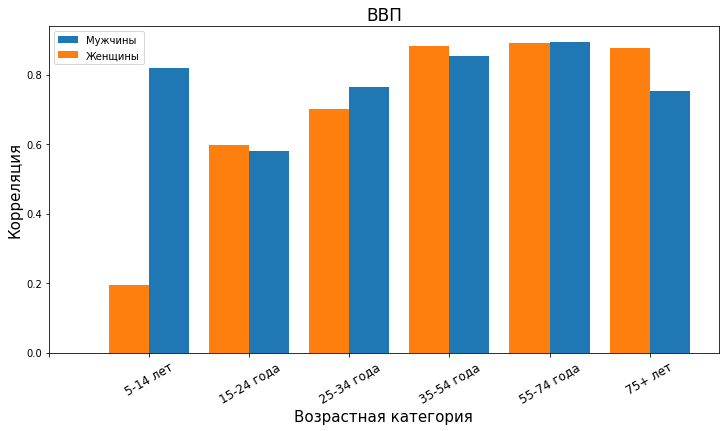

In [1299]:
x_1 = syr("5-14 years", "male", 100000000)
x_2 = syr("15-24 years", "male", 100000000)
x_3 = syr("25-34 years", "male", 100000000)
x_4 = syr("35-54 years", "male", 100000000)
x_5 = syr("55-74 years", "male", 100000000)
x_6 = syr("75+ years", "male", 100000000)

y_1 = syr("5-14 years", "female", 100000000)
y_2 = syr("15-24 years", "female", 100000000)
y_3 = syr("25-34 years", "female", 100000000)
y_4 = syr("35-54 years", "female", 100000000)
y_5 = syr("55-74 years", "female", 100000000)
y_6 = syr("75+ years", "female", 100000000)

graf_2('ВВП')

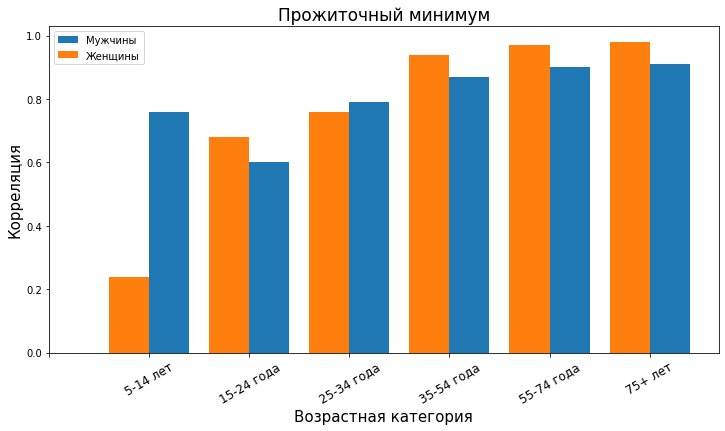

In [1300]:
x_1 = syr_liv("5-14 years", "male", 100000000)
x_2 = syr_liv("15-24 years", "male", 100000000)
x_3 = syr_liv("25-34 years", "male", 100000000)
x_4 = syr_liv("35-54 years", "male", 100000000)
x_5 = syr_liv("55-74 years", "male", 100000000)
x_6 = syr_liv("75+ years", "male", 100000000)

y_1 = syr_liv("5-14 years", "female", 100000000)
y_2 = syr_liv("15-24 years", "female", 100000000)
y_3 = syr_liv("25-34 years", "female", 100000000)
y_4 = syr_liv("35-54 years", "female", 100000000)
y_5 = syr_liv("55-74 years", "female", 100000000)
y_6 = syr_liv("75+ years", "female", 100000000)

graf_2("Прожиточный минимум")

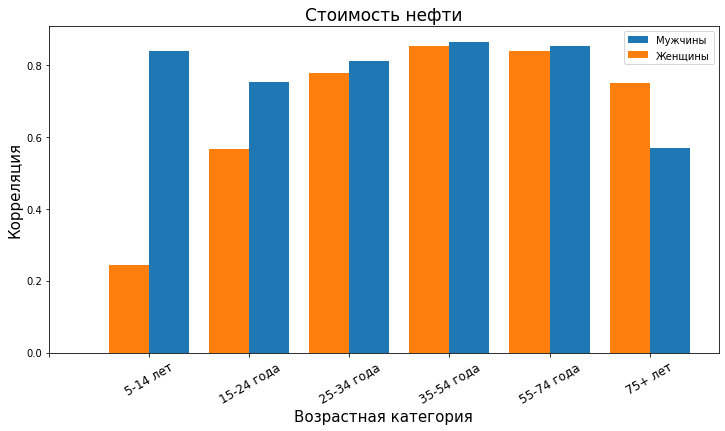

In [1301]:
x_1 = syr_costoil("5-14 years", "male", 100000000)
x_2 = syr_costoil("15-24 years", "male", 100000000)
x_3 = syr_costoil("25-34 years", "male", 100000000)
x_4 = syr_costoil("35-54 years", "male", 100000000)
x_5 = syr_costoil("55-74 years", "male", 100000000)
x_6 = syr_costoil("75+ years", "male", 100000000)

y_1 = syr_costoil("5-14 years", "female", 100000000)
y_2 = syr_costoil("15-24 years", "female", 100000000)
y_3 = syr_costoil("25-34 years", "female", 100000000)
y_4 = syr_costoil("35-54 years", "female", 100000000)
y_5 = syr_costoil("55-74 years", "female", 100000000)
y_6 = syr_costoil("75+ years", "female", 100000000)

graf_2('Стоимость нефти')

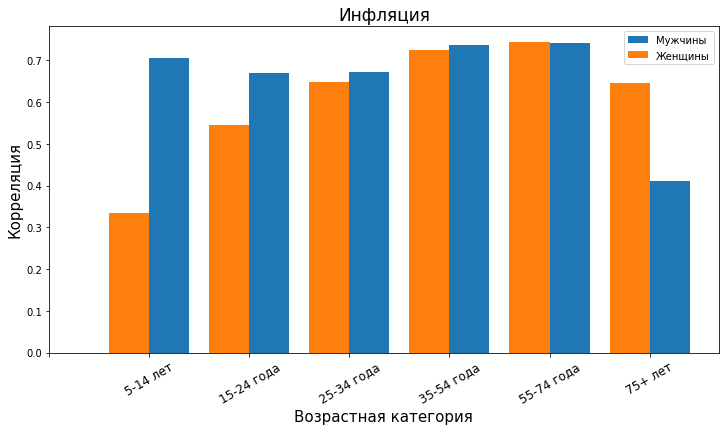

In [1302]:
x_1 = syr_inf("5-14 years", "male", 100000000)
x_2 = syr_inf("15-24 years", "male", 100000000)
x_3 = syr_inf("25-34 years", "male", 100000000)
x_4 = syr_inf("35-54 years", "male", 100000000)
x_5 = syr_inf("55-74 years", "male", 100000000)
x_6 = syr_inf("75+ years", "male", 100000000)

y_1 = syr_inf("5-14 years", "female", 100000000)
y_2 = syr_inf("15-24 years", "female", 100000000)
y_3 = syr_inf("25-34 years", "female", 100000000)
y_4 = syr_inf("35-54 years", "female", 100000000)
y_5 = syr_inf("55-74 years", "female", 100000000)
y_6 = syr_inf("75+ years", "female", 100000000)

graf_2('Инфляция')

In [1303]:
population = []
def popul(a: str, b: str):
  global population
  need_arr = DF[(DF.age == a) & (DF.sex == b) & (DF.year >= 2000)]["population"]
  population.append(round(sum(list(need_arr)) / 16))

In [1304]:
popul("5-14 years", "male")
popul("5-14 years", "female")
popul("15-24 years", "male")
popul("15-24 years", "female")
popul("25-34 years", "male")
popul("25-34 years", "female")
popul("35-54 years", "male")
popul("35-54 years", "female")
popul("55-74 years", "male")
popul("55-74 years", "female")
popul("75+ years", "male")
popul("75+ years", "female")

In [1305]:
population = np.array(population)

In [1306]:
result_gdp = sum(population * itog_cor_gdp)
result_inf = sum(population * itog_cor_inf)
result_dollar = sum(population * itog_cor_dollar)
result_costoil = sum(population * itog_cor_costoil)
result_liv = sum(population * itog_cor_liv)



dff = pd.DataFrame([['ВВП',round(result_gdp / 1000000, 2)],
                  ['Инфляция',round(result_inf / 1000000, 2)],
                  ['Курс доллара',round(result_dollar / 1000000, 2)],
                   ['Цена нефти',round(result_costoil / 1000000, 2)],
                   ['Прож. минмум',round(result_liv / 1000000, 2)]], columns=['Признак','Коэффициент Черемисина-Деомидова'])



dff.style.hide_index()

Признак,Коэффициент Черемисина-Деомидова
ВВП,103.800000
Инфляция,91.130000
Курс доллара,65.920000
Цена нефти,104.490000
Прож. минмум,109.790000


**Новые графики**


**ВВП**

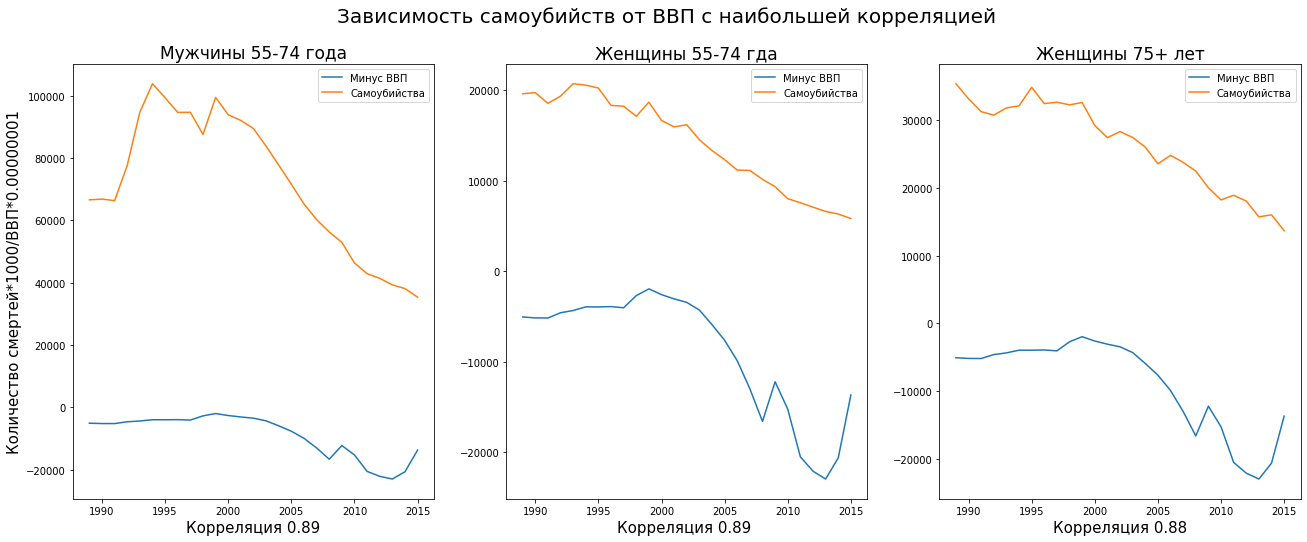

In [1307]:
gtp_g = [["55-74 years", "male", 0.89], ["55-74 years", "female", 0.89],["75+ years", "female", 0.88]]
def graf(d: list):
  a=d[0]
  b=d[1]
  c=d[2]
  fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize = (22, 8) )
  fig. suptitle('Зависимость самоубийств от ВВП с наибольшей корреляцией', fontsize=20)

  x = syr(a[0], a[1], 100000000)
  d = []
  for i in x[1]:
    d.append(-i)
  axs[0].plot(x[0], d, label = 'Минус ВВП')
  axs[0].plot(x[0], x[2], label = 'Самоубийства')
  axs[0].set_title('Мужчины 55-74 года', fontsize=17)
  axs[0].legend()
  axs[0].set_ylabel('Количество смертей*1000/ВВП*0.00000001', fontsize=15)
  axs[0].set_xlabel('Корреляция 0.89', fontsize=15)

  y = syr(b[0], b[1], 100000000)
  axs[1].plot(y[0], d, label = 'Минус ВВП')
  axs[1].plot(y[0], y[2], label = 'Самоубийства')
  axs[1].set_title('Женщины 55-74 гда', fontsize=17)
  axs[1].legend()
  axs[1].set_xlabel('Корреляция 0.89 ', fontsize=15)

  z = syr(c[0], c[1], 100000000)
  axs[2].plot(z[0], d, label = 'Минус ВВП')
  axs[2].plot(z[0], z[2], label = 'Самоубийства')
  axs[2].set_title('Женщины 75+ лет', fontsize=17)
  axs[2].legend()
  axs[2].set_xlabel('Корреляция 0.88', fontsize=15)

graf(gtp_g)

**Прожиточный минимум**

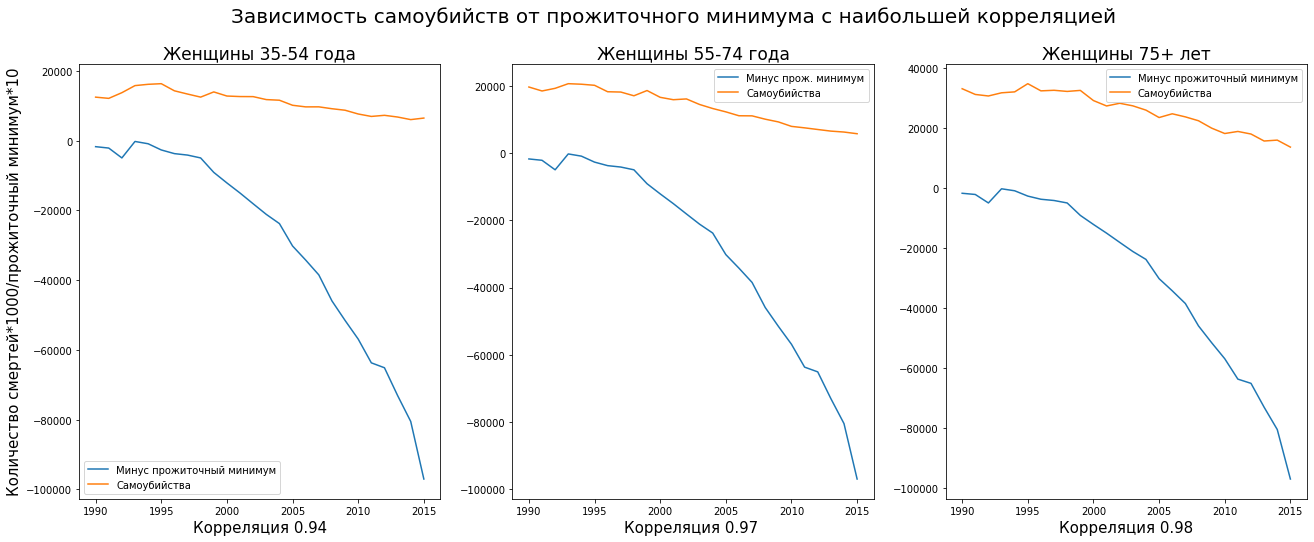

In [1308]:
liv_g = [["35-54 years", "female", 0.94], ["55-74 years", "female", 0.97], ["75+ years", "female", 0.98]]
def graf(d: list):
  a=d[0]
  b=d[1]
  c=d[2]
  fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize = (22, 8) )
  fig. suptitle('Зависимость самоубийств от прожиточного минимума с наибольшей корреляцией', fontsize=20)

  x = syr_liv(a[0], a[1], 0.1)
  d = []
  for i in x[1]:
    d.append(-i)
  axs[0].plot(x[0], d, label = 'Минус прожиточный минимум')
  axs[0].plot(x[0], x[2], label = 'Самоубийства')
  axs[0].set_title('Женщины 35-54 года', fontsize=17)
  axs[0].legend()
  axs[0].set_ylabel('Количество смертей*1000/прожиточный минимум*10', fontsize=15)
  axs[0].set_xlabel('Корреляция 0.94', fontsize=15)

  y = syr_liv(b[0], b[1])
  axs[1].plot(y[0], d, label = 'Минус прож. минимум')
  axs[1].plot(y[0], y[2], label = 'Самоубийства')
  axs[1].set_title('Женщины 55-74 года', fontsize=17)
  axs[1].legend()
  axs[1].set_xlabel('Корреляция 0.97 ', fontsize=15)

  z = syr_liv(c[0], c[1])
  axs[2].plot(z[0], d, label = 'Минус прожиточный минимум')
  axs[2].plot(z[0], z[2], label = 'Самоубийства')
  axs[2].set_title('Женщины 75+ лет', fontsize=17)
  axs[2].legend()
  axs[2].set_xlabel('Корреляция 0.98', fontsize=15)

graf(liv_g)

**Стоимость нефти**

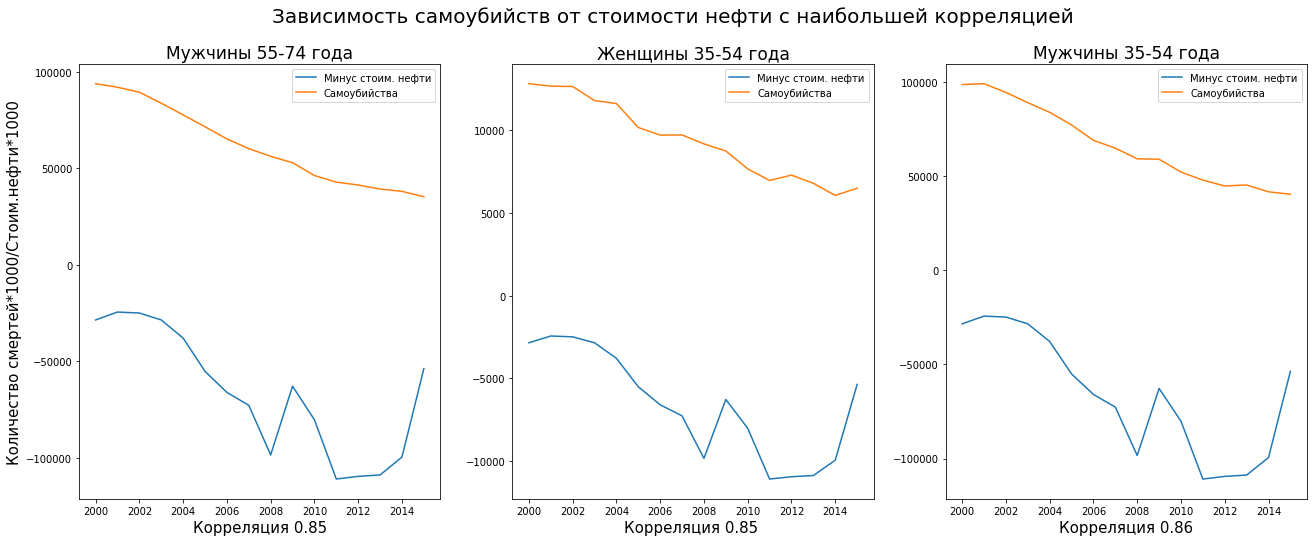

In [1309]:
costoil_g = [["55-74 years", "male", 0.85], ["35-54 years", "female", 0.85], ["35-54 years", "male", 0.86]]
def graf(d: list):
  a=d[0]
  b=d[1]
  c=d[2]
  fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize = (22, 8) )
  fig. suptitle('Зависимость самоубийств от стоимости нефти с наибольшей корреляцией', fontsize=20)

  x = syr_costoil(a[0], a[1], 0.001)
  d = []
  for i in x[1]:
    d.append(-i)
  axs[0].plot(x[0], d, label = 'Минус стоим. нефти')
  axs[0].plot(x[0], x[2], label = 'Самоубийства')
  axs[0].set_title('Мужчины 55-74 года', fontsize=17)
  axs[0].legend()
  axs[0].set_ylabel('Количество смертей*1000/Стоим.нефти*1000', fontsize=15)
  axs[0].set_xlabel('Корреляция 0.85', fontsize=15)

  y = syr_costoil(b[0], b[1], 0.01)
  k = []
  for i in y[1]:
    k.append(-i)
  axs[1].plot(y[0], k, label = 'Минус стоим. нефти')
  axs[1].plot(y[0], y[2], label = 'Самоубийства')
  axs[1].set_title('Женщины 35-54 года', fontsize=17)
  axs[1].legend()
  axs[1].set_xlabel('Корреляция 0.85 ', fontsize=15)

  z = syr_costoil(c[0], c[1])
  axs[2].plot(z[0], d, label = 'Минус стоим. нефти')
  axs[2].plot(z[0], z[2], label = 'Самоубийства')
  axs[2].set_title('Мужчины 35-54 года', fontsize=17)
  axs[2].legend()
  axs[2].set_xlabel('Корреляция 0.86', fontsize=15)

graf(costoil_g)

**Инфляция**

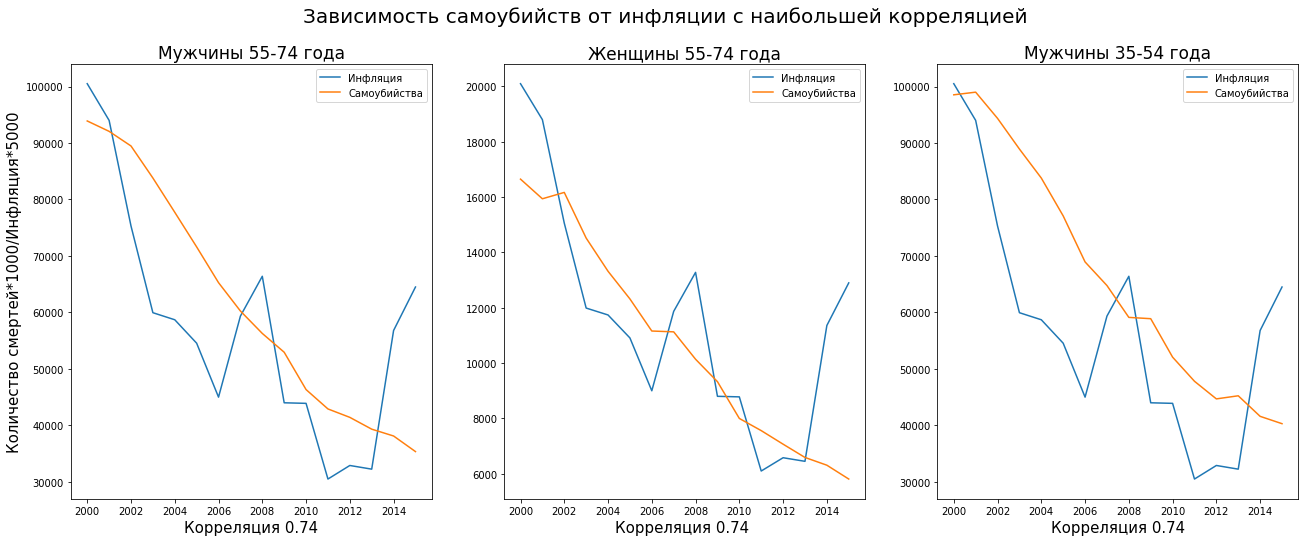

In [1310]:
inf_g = [["55-74 years", "male", 0.74], ["55-74 years", "female", 0.74], ["35-54 years", "male", 0.74]]
def graf(d: list):
  a=d[0]
  b=d[1]
  c=d[2]
  fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize = (22, 8) )
  fig. suptitle('Зависимость самоубийств от инфляции с наибольшей корреляцией', fontsize=20)

  x = syr_inf(a[0], a[1], 0.0002)
  d = []
  for i in x[1]:
    d.append(i)
  axs[0].plot(x[0], d, label = 'Инфляция')
  axs[0].plot(x[0], x[2], label = 'Самоубийства')
  axs[0].set_title('Мужчины 55-74 года', fontsize=17)
  axs[0].legend()
  axs[0].set_ylabel('Количество смертей*1000/Инфляция*5000', fontsize=15)
  axs[0].set_xlabel('Корреляция 0.74', fontsize=15)

  y = syr_inf(b[0], b[1], 0.001)
  axs[1].plot(y[0], y[1], label = 'Инфляция')
  axs[1].plot(y[0], y[2], label = 'Самоубийства')
  axs[1].set_title('Женщины 55-74 года', fontsize=17)
  axs[1].legend()
  axs[1].set_xlabel('Корреляция 0.74 ', fontsize=15)

  z = syr_inf(c[0], c[1])
  axs[2].plot(z[0], d, label = 'Инфляция')
  axs[2].plot(z[0], z[2], label = 'Самоубийства')
  axs[2].set_title('Мужчины 35-54 года', fontsize=17)
  axs[2].legend()
  axs[2].set_xlabel('Корреляция 0.74', fontsize=15)

graf(inf_g)

**После расчета коэффициента корреляции Деомидова - Черемисина получили, что в линейную регрессию пойдет 4 признака: ВВП, инфляция, курс доллара, прожиточный минимум**

In [1311]:
lin_reg_coef = []
def lin_reg(age: str, sex: str):
  global lin_reg_coef
  pup = DF[(DF.age == age) & (DF.sex == sex) & (DF.year >= 2000)]

  x_1 = np.array(pup[" gdp_for_year ($) "])
  x_2 = np.array(pup["inflation (%)"]) / 10
  x_3 = np.array(pup["cost of oil ($/barrel)"]) / 10
  x_4 = np.array(pup["living wage (₽)"]) / 1000
  suic = np.array(pup["suicides/100k pop"])

  for i in range(len(x_1)):
    x_1[i] = int((x_1[i].replace(",", "")))
  x_1 = np.array(x_1) / 10000000000

  X = []
  for i in range(len(x_1)):
    X.append([x_1[i], x_2[i], x_3[i], x_4[i]])

  reg = LinearRegression()
  reg.fit(X, suic)

  lost = 0
  for i in range(len(x_1)):
    lost += abs(suic[i] - reg.intercept_ - x_1[i] * reg.coef_[0] - x_2[i] * reg.coef_[1] - x_3[i] * reg.coef_[2] - x_4[i] * reg.coef_[3])
  # print(lost / len(x_1))  ### Средняя погрешность
  prom = list(reg.coef_)
  prom.append(reg.intercept_)
  lin_reg_coef.append(prom)

In [1312]:
lin_reg("5-14 years", "male")
lin_reg("5-14 years", "female")
lin_reg("15-24 years", "male")
lin_reg("15-24 years", "female")
lin_reg("25-34 years", "male")
lin_reg("25-34 years", "female")
lin_reg("35-54 years", "male")
lin_reg("35-54 years", "female")
lin_reg("55-74 years", "male")
lin_reg("55-74 years", "female")
lin_reg("75+ years", "male")
lin_reg("75+ years", "female")
print("")

In [1313]:
# print(itog_cor_gdp)
# print(itog_cor_inf)
# print(itog_cor_dollar)
# print(itog_cor_costoil)
# print(itog_cor_liv)

In [1314]:
gdp_new = [1282663000000, 1578417000000, 1630659000000, 1610381000000, 1480000000000] 
inf_new = [5.4, 2.5, 4.3, 3.0, 4.9]
costoil_new = [43.73, 54.19, 71.31, 64.21, 41.84]
liv_new = [9828, 10088, 10287, 10890, 11300]

**Предсказание самоубийств по годам**

**2016**

In [1315]:
df2016 = pd.read_excel("Aver_2016.xls")
df2016.drop(0)

,year,male,female
1,0.0,979259.0,926376.0
2,1.0,992523.0,938121.0
3,2.0,987915.0,934888.0
4,3.0,985241.0,932683.0
5,4.0,960901.0,908858.0
...,...,...,...
96,95.0,5448.0,20188.0
97,96.0,3713.0,12956.0
98,97.0,2358.0,8501.0
99,98.0,1650.0,5925.0


In [1316]:
def popuul_2016(age0: int, age1: int, sex: str):
  if sex == "male":
    syka = df2016[(df2016.year >= age0) & (df2016.year <= age1)]["male"]
  if sex == "female":
    syka = df2016[(df2016.year >= age0) & (df2016.year <= age1)]["female"]
  return int(sum(list(syka)))

In [1317]:
popul_2016 = []
popul_2016.append(popuul_2016(5, 14, "male"))
popul_2016.append(popuul_2016(5, 14, "female"))
popul_2016.append(popuul_2016(15, 24, "male"))
popul_2016.append(popuul_2016(15, 24, "female"))
popul_2016.append(popuul_2016(25, 34, "male"))
popul_2016.append(popuul_2016(25, 34, "female"))
popul_2016.append(popuul_2016(35, 54, "male"))
popul_2016.append(popuul_2016(35, 54, "female"))
popul_2016.append(popuul_2016(55, 74, "male"))
popul_2016.append(popuul_2016(55, 74, "female"))
popul_2016.append(popuul_2016(75, 99, "male"))
popul_2016.append(popuul_2016(75, 99, "female"))
popul_2016 = np.array(popul_2016)
popul_2016 = popul_2016 / 100000

In [1318]:
summ = 0
itog_2016 = 0
for j in range(12):
  summ = 0
  summ += (1282663000000 / 10000000000) * float(lin_reg_coef[j][0])
  summ += 0.54 * lin_reg_coef[j][1]
  summ += 4.373 * lin_reg_coef[j][2] 
  summ += 9.828 * lin_reg_coef[j][3]
  summ += lin_reg_coef[j][4] 
  itog_2016 += summ * popul_2016[j]
itog_2016 /= 1460

**2017**

In [1319]:
df2017 = pd.read_excel("Aver_2017.xls")
df2017.drop(0)

,age,male,female
1,0.0,915574.0,866249.0
2,1.0,979022.0,926310.0
3,2.0,993366.0,938912.0
4,3.0,989022.0,935957.0
5,4.0,986304.0,933667.0
...,...,...,...
96,95.0,5895.0,21955.0
97,96.0,4620.0,15432.0
98,97.0,3151.0,9641.0
99,98.0,1910.0,6031.0


In [1320]:
def popuul_2017(age0: int, age1: int, sex: str):
  if sex == "male":
    syka = df2017[(df2017.age >= age0) & (df2017.age <= age1)]["male"]
  if sex == "female":
    syka = df2017[(df2017.age >= age0) & (df2017.age <= age1)]["female"]
  return int(sum(list(syka)))

In [1321]:
popul_2017 = []
popul_2017.append(popuul_2017(5, 14, "male"))
popul_2017.append(popuul_2017(5, 14, "female"))
popul_2017.append(popuul_2017(15, 24, "male"))
popul_2017.append(popuul_2017(15, 24, "female"))
popul_2017.append(popuul_2017(25, 34, "male"))
popul_2017.append(popuul_2017(25, 34, "female"))
popul_2017.append(popuul_2017(35, 54, "male"))
popul_2017.append(popuul_2017(35, 54, "female"))
popul_2017.append(popuul_2017(55, 74, "male"))
popul_2017.append(popuul_2017(55, 74, "female"))
popul_2017.append(popuul_2017(75, 99, "male"))
popul_2017.append(popuul_2017(75, 99, "female"))
popul_2017 = np.array(popul_2017)
popul_2017 = popul_2017 / 100000

In [1322]:
summ = 0
itog_2017 = 0
for j in range(12):
  summ = 0
  summ += (1578417000000/ 10000000000) * float(lin_reg_coef[j][0])
  summ += 0.25 * lin_reg_coef[j][1]
  summ += 5.419 * lin_reg_coef[j][2] 
  summ += 10.088 * lin_reg_coef[j][3]
  summ += lin_reg_coef[j][4] 
  itog_2017 += summ * popul_2017[j]
itog_2017 /= 1460

**2018**

In [1323]:
df2018 = pd.read_excel("Aver_2018.xlsx")
df2018.drop(0)

,age,male,female
1,1,915468,866291
2,2,979662,926926
3,3,994215,939710
4,4,989745,936665
5,5,987070,934394
...,...,...,...
95,95,7099,26273
96,96,5024,16516
97,97,4044,11830
98,98,2750,7381


In [1324]:
def popuul_2018(age0: int, age1: int, sex: str):
  if sex == "male":
    syka = df2018[(df2018.age >= age0) & (df2018.age <= age1)]["male"]
  if sex == "female":
    syka = df2018[(df2018.age >= age0) & (df2018.age <= age1)]["female"]
  return int(sum(list(syka)))

In [1325]:
popul_2018 = []
popul_2018.append(popuul_2018(5, 14, "male"))
popul_2018.append(popuul_2018(5, 14, "female"))
popul_2018.append(popuul_2018(15, 24, "male"))
popul_2018.append(popuul_2018(15, 24, "female"))
popul_2018.append(popuul_2018(25, 34, "male"))
popul_2018.append(popuul_2018(25, 34, "female"))
popul_2018.append(popuul_2018(35, 54, "male"))
popul_2018.append(popuul_2018(35, 54, "female"))
popul_2018.append(popuul_2018(55, 74, "male"))
popul_2018.append(popuul_2018(55, 74, "female"))
popul_2018.append(popuul_2018(75, 99, "male"))
popul_2018.append(popuul_2018(75, 99, "female"))
popul_2018 = np.array(popul_2018)
popul_2018 = popul_2018 / 100000

In [1326]:
summ = 0
itog_2018 = 0
for j in range(12):
  summ = 0
  summ += (1630659000000/ 10000000000) * float(lin_reg_coef[j][0])
  summ += (4.3 / 10) * lin_reg_coef[j][1]
  summ += (71.31 / 10) * lin_reg_coef[j][2] 
  summ += (10287 / 1000) * lin_reg_coef[j][3]
  summ += lin_reg_coef[j][4] 
  itog_2018 += summ * popul_2018[j]
itog_2018 /= 1460

**2019**

In [1327]:
df2019 = pd.read_excel("Aver_2019.xlsx")
df2019.drop(0)

,age,male,female
1,1,844957,796434
2,2,916185,867019
3,3,980540,927708
4,4,994957,940464
5,5,990419,937334
...,...,...,...
95,95,9032,32514
96,96,6068,19839
97,97,4391,12539
98,98,3642,9394


In [1328]:
def popuul_2019(age0: int, age1: int, sex: str):
  if sex == "male":
    syka = df2019[(df2019.age >= age0) & (df2019.age <= age1)]["male"]
  if sex == "female":
    syka = df2019[(df2019.age >= age0) & (df2019.age <= age1)]["female"]
  return int(sum(list(syka)))

In [1329]:
popul_2019 = []
popul_2019.append(popuul_2019(5, 14, "male"))
popul_2019.append(popuul_2019(5, 14, "female"))
popul_2019.append(popuul_2019(15, 24, "male"))
popul_2019.append(popuul_2019(15, 24, "female"))
popul_2019.append(popuul_2019(25, 34, "male"))
popul_2019.append(popuul_2019(25, 34, "female"))
popul_2019.append(popuul_2019(35, 54, "male"))
popul_2019.append(popuul_2019(35, 54, "female"))
popul_2019.append(popuul_2019(55, 74, "male"))
popul_2019.append(popuul_2019(55, 74, "female"))
popul_2019.append(popuul_2019(75, 99, "male"))
popul_2019.append(popuul_2019(75, 99, "female"))
popul_2019 = np.array(popul_2019)
popul_2019 = popul_2019 / 100000

In [1330]:
summ = 0
itog_2019 = 0
for j in range(12):
  summ = 0
  summ += (1610381000000/ 10000000000) * float(lin_reg_coef[j][0])
  summ += (3.0 / 10) * lin_reg_coef[j][1]
  summ += (64.21 / 10) * lin_reg_coef[j][2] 
  summ += (10890 / 1000) * lin_reg_coef[j][3]
  summ += lin_reg_coef[j][4] 
  itog_2019 += summ * popul_2019[j]
itog_2019 /= 1460

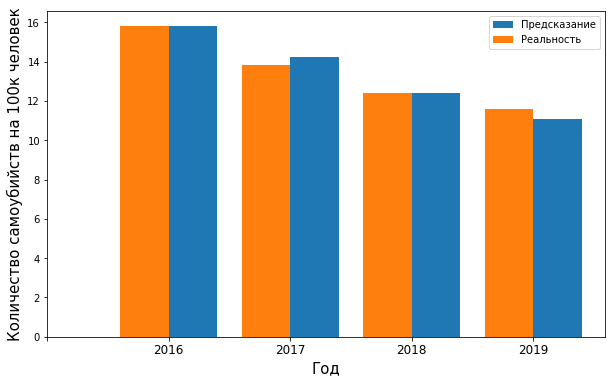

In [1331]:
predskaz = [itog_2016, itog_2017, itog_2018, itog_2019]
realnost = [15.8, 13.8, 12.4, 11.6]

X = [1, 2, 3, 4]
Y = [6, 5, 4, 3]

A_M = [1+0.2, 2+0.2, 3+0.2, 4+0.2]
A_W = [1-0.2, 2-0.2, 3-0.2, 4-0.2]
fig, ax = plt.subplots()

ax.bar(A_M, predskaz, width = 0.4, label="Предсказание")
ax.bar(A_W, realnost, width = 0.4, label="Реальность")
ax.set_xlabel('Год', fontsize=15)
ax.set_ylabel('Количество самоубийств на 100к человек', fontsize=15)
ax.legend()
fig.set_figwidth(10)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.xticks(np.arange(5),
           labels=['', '2016', '2017', '2018', '2019'],
           fontsize=12)
plt.show()

**Коэффициент детерминации**

In [1332]:
x = r2_score(realnost, predskaz)
round(x, 2)

0.96